In [1]:
from helper import plot_metrics, read_dict

env: (30x30, max_step=1200)

reward:
- 1 * cella con stima sbagliata osservata
- 8 * cella osservata dalla posizione migliore
- -2 se l'agente sta fermo 

# Train data

In [2]:
train_data_entropy = read_dict(file_path=f"./data/entropy/train_data_entropy.json")
train_data_loss = read_dict(file_path=f"./data/loss/train_data_loss.json")
train_data_random = read_dict(file_path=f"./data/random/train_data_random.json")

In [3]:
train_data_entropy.keys()

dict_keys(['episode_rewards', 'episode_cells_marker_pred_1', 'episode_cells_seen_pov', 'episode_steps'])

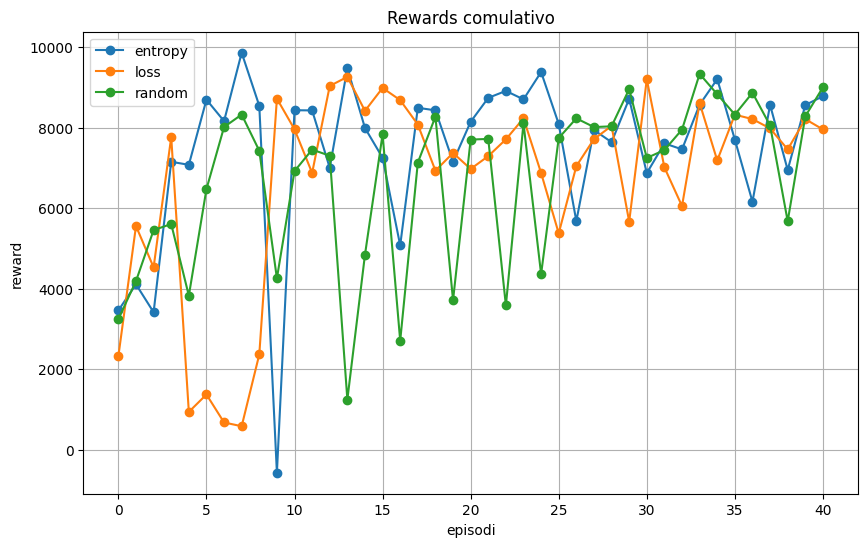

In [4]:
plot_metrics([train_data_entropy['episode_rewards'], train_data_loss['episode_rewards'], train_data_random['episode_rewards']],
              title="Rewards comulativo",
              ylabel="reward",
              xlabel="episodi",
              legend_labels=["entropy", "loss", "random"])

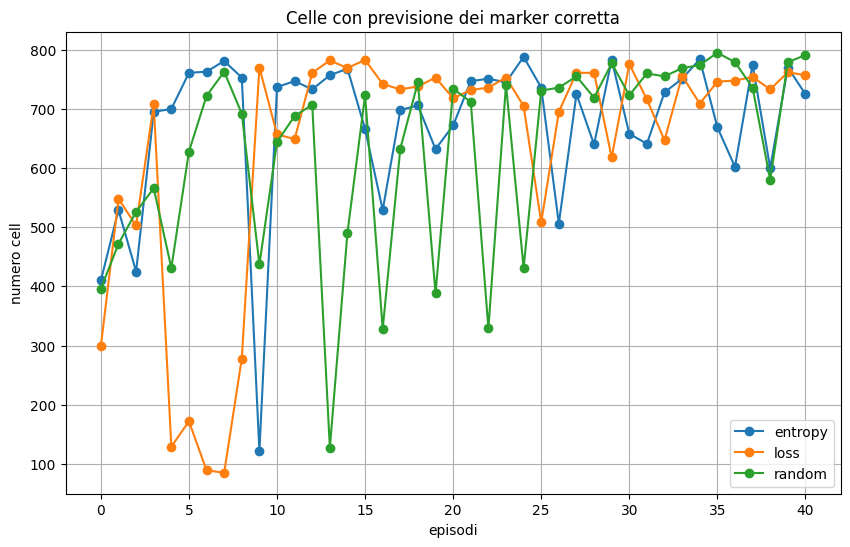

In [5]:
plot_metrics([train_data_entropy['episode_cells_marker_pred_1'], train_data_loss['episode_cells_marker_pred_1'], train_data_random['episode_cells_marker_pred_1']],
              title="Celle con previsione dei marker corretta",
              ylabel="numero cell",
              xlabel="episodi",
              legend_labels=["entropy", "loss", "random"])

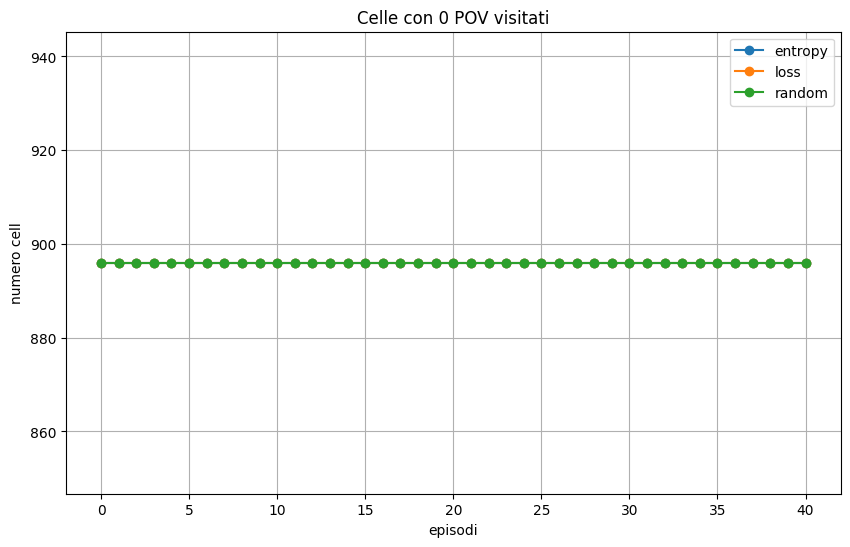

In [6]:
plot_metrics([train_data_entropy['episode_cells_seen_pov'], train_data_loss['episode_cells_seen_pov'], train_data_random['episode_cells_seen_pov']],
              title="Celle con 0 POV visitati",
              ylabel="numero cell",
              xlabel="episodi",
              legend_labels=["entropy", "loss", "random"])

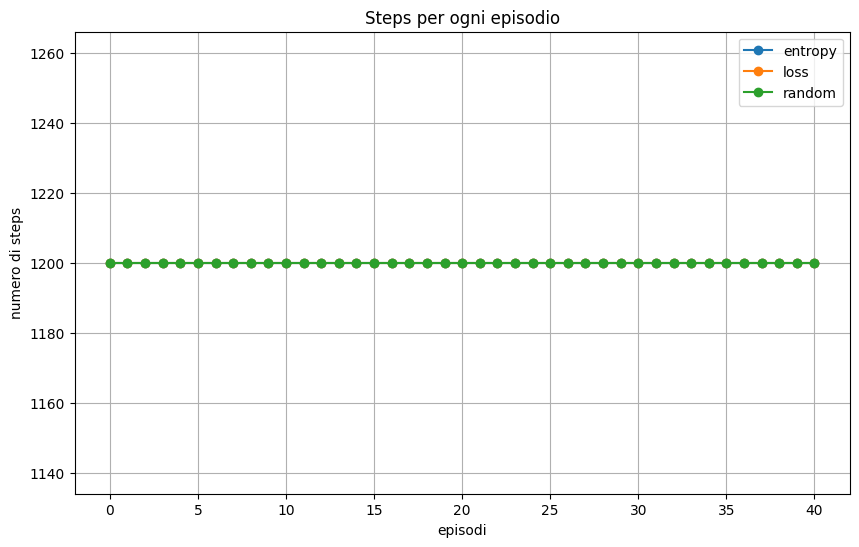

In [7]:
plot_metrics([train_data_entropy['episode_steps'], train_data_loss['episode_steps'], train_data_random['episode_steps']],
              title="Steps per ogni episodio",
              ylabel="numero di steps",
              xlabel="episodi",
              legend_labels=["entropy", "loss", "random"])

# Test data

In [8]:
test_data_entropy = read_dict(file_path=f"./data/entropy/test_data_entropy.json")
test_data_loss = read_dict(file_path=f"./data/loss/test_data_loss.json")
test_data_random = read_dict(file_path=f"./data/random/test_data_random.json")

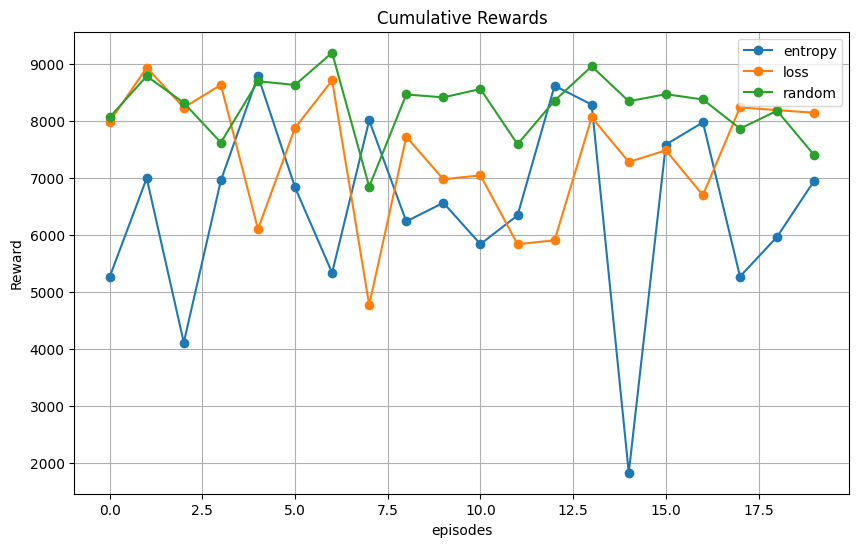

In [9]:
plot_metrics([test_data_entropy['cumulative_rewards_per_run'], test_data_loss['cumulative_rewards_per_run'], test_data_random['cumulative_rewards_per_run']],
              title="Cumulative Rewards",
              ylabel="Reward",
              xlabel="episodes",
              legend_labels=["entropy", "loss", "random"])

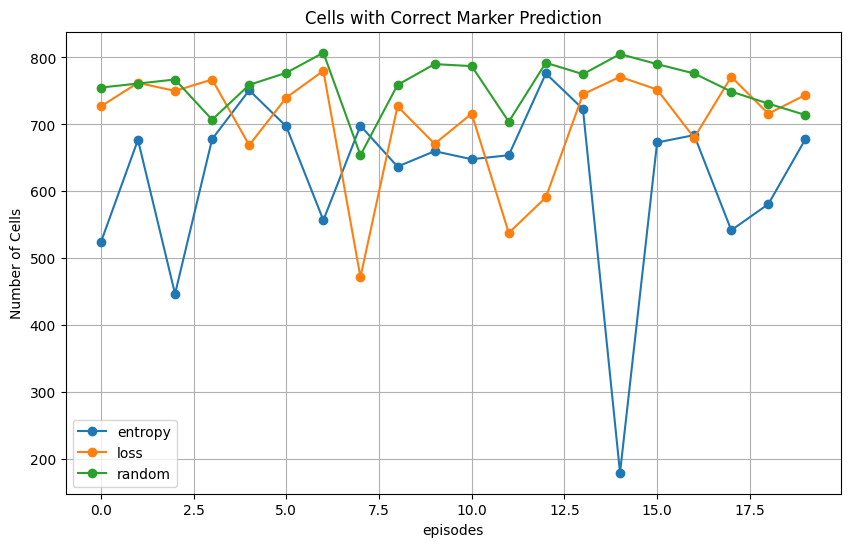

In [10]:
plot_metrics([test_data_entropy['cells_marker_pred_1_per_run'], test_data_loss['cells_marker_pred_1_per_run'], test_data_random['cells_marker_pred_1_per_run']],
              title="Cells with Correct Marker Prediction",
              ylabel="Number of Cells",
              xlabel="episodes",
              legend_labels=["entropy", "loss", "random"])

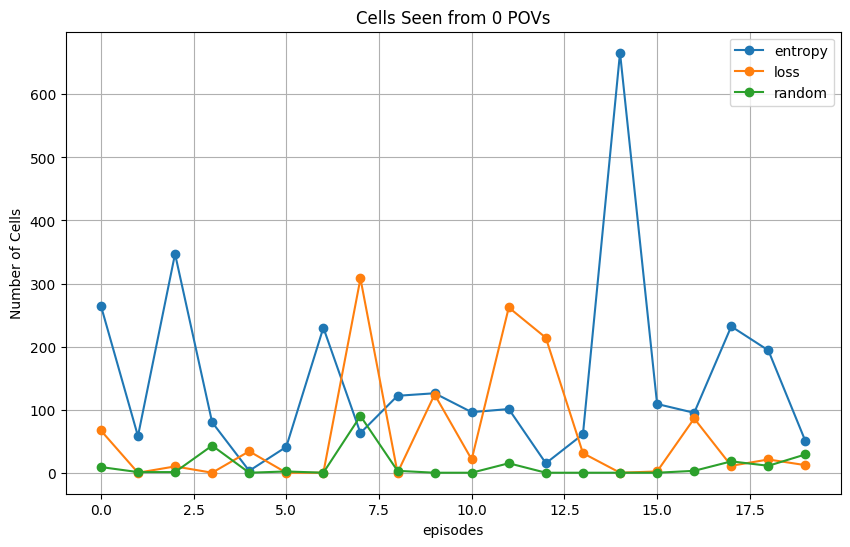

In [11]:
plot_metrics([test_data_entropy['cells_seen_pov_per_run'], test_data_loss['cells_seen_pov_per_run'], test_data_random['cells_seen_pov_per_run']],
              title="Cells Seen from 0 POVs",
              ylabel="Number of Cells",
              xlabel="episodes",
              legend_labels=["entropy", "loss", "random"])

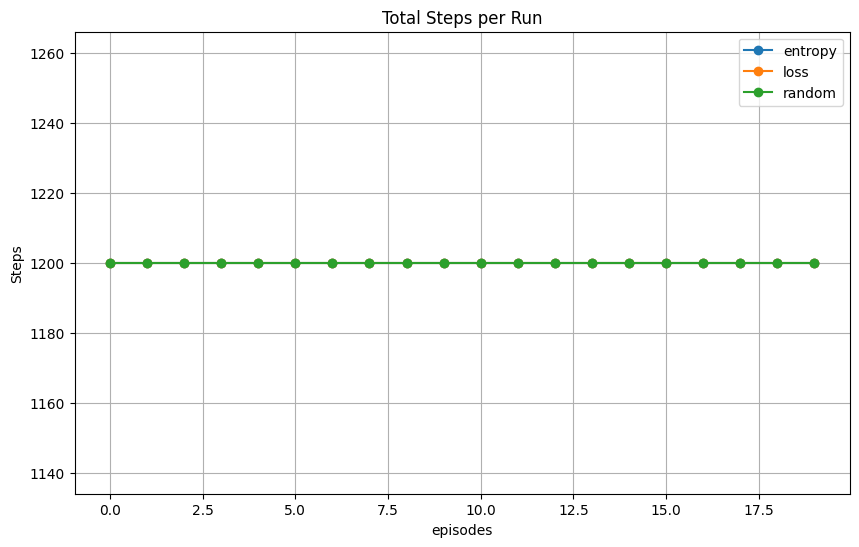

In [12]:
plot_metrics([test_data_entropy['total_steps_per_run'], test_data_loss['total_steps_per_run'], test_data_random['total_steps_per_run']],
              title="Total Steps per Run",
              ylabel="Steps",
              xlabel="episodes",
              legend_labels=["entropy", "loss", "random"])

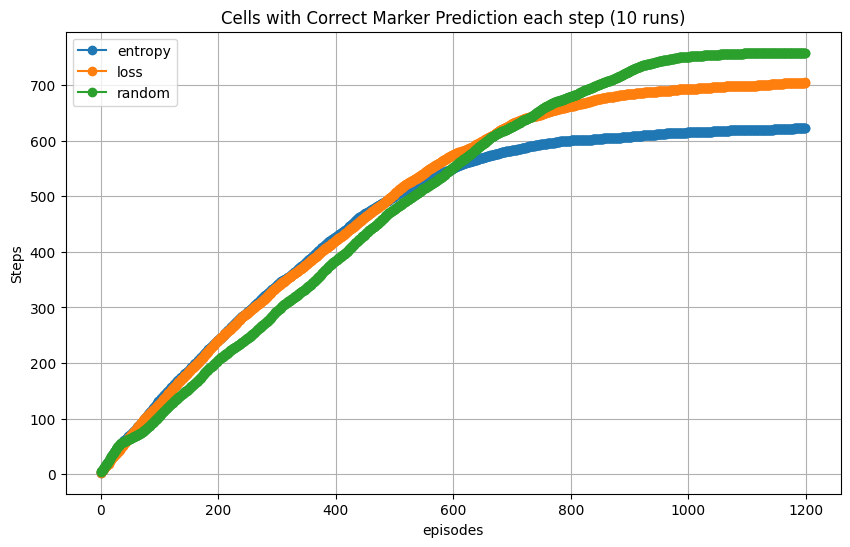

In [13]:
plot_metrics([test_data_entropy['cells_marker_pred_1_mean'], test_data_loss['cells_marker_pred_1_mean'], test_data_random['cells_marker_pred_1_mean']],
              title="Cells with Correct Marker Prediction each step (10 runs)",
              ylabel="Steps",
              xlabel="episodes",
              legend_labels=["entropy", "loss", "random"])